#How To Train YOLOv5 Oriented Bounding Boxes Custom Object Detection

Oriented bounding boxes are bounding boxes rotated to better fit the objects represented on an angle. In this notebook, we use the YOLOv5-OBB repository in order to train an already annotated dataset to view the Oriented bounding boxes detection at play.


## Instructions

Run one cell at at time and run:

```
>>> import torch
>>> torch.version.cuda
>>> exit()
```

when prompted to in the first cell. 

Addidtional Resources:

- [Yolov5-OBB installation instructions](https://github.com/hukaixuan19970627/yolov5_obb/blob/master/docs/install.md)
- [Getting started](https://github.com/hukaixuan19970627/yolov5_obb/blob/master/docs/GetStart.md)

In [4]:
!pip3 install torch==1.11.0+cu113 torchvision==0.11.2+cu113 torchaudio==0.10.1+cu113 -f https://download.pytorch.org/whl/cu113/torch_stable.html
!nvcc -V
#!python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://download.pytorch.org/whl/cu113/torch_stable.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 GB 1.1 MB/s eta 0:00:00
ERROR: Could not find a version that satisfies the requirement torchvision==0.11.2+cu113 (from versions: 0.1.6, 0.1.7, 0.1.8, 0.1.9, 0.2.0, 0.2.1, 0.2.2, 0.2.2.post2, 0.2.2.post3, 0.12.0, 0.12.0+cu113, 0.13.0, 0.13.0+cu113, 0.13.1, 0.13.1+cu113, 0.14.0, 0.14.1, 0.15.0, 0.15.1, 0.15.2)
ERROR: No matching distribution found for torchvision==0.11.2+cu113
nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2022 NVIDIA Corporation
Built on Wed_Sep_21_10:33:58_PDT_2022
Cuda compilation tools, release 11.8, V11.8.89
Build cuda_11.8.r11.8/compiler.31833905_0


In [2]:
!git clone https://github.com/hukaixuan19970627/yolov5_obb.git

Cloning into 'yolov5_obb'...
remote: Enumerating objects: 704, done.
remote: Counting objects: 100% (162/162), done.
remote: Compressing objects: 100% (40/40), done.
remote: Total 704 (delta 123), reused 122 (delta 122), pack-reused 542
Receiving objects: 100% (704/704), 18.16 MiB | 16.66 MiB/s, done.
Resolving deltas: 100% (324/324), done.


In [3]:
%cd /content/yolov5_obb/
!pip install -r requirements.txt

/content/yolov5_obb
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
%cd utils/nms_rotated
!python setup.py develop  #or "pip install -v -e ."

/content/yolov5_obb/utils/nms_rotated
running develop
/usr/local/lib/python3.10/dist-packages/setuptools/command/develop.py:40: EasyInstallDeprecationWarning: easy_install command is deprecated.
!!

        ********************************************************************************
        Please avoid running ``setup.py`` and ``easy_install``.
        Instead, use pypa/build, pypa/installer, pypa/build or
        other standards-based tools.

        See https://github.com/pypa/setuptools/issues/917 for details.
        ********************************************************************************

!!
  easy_install.initialize_options(self)
/usr/local/lib/python3.10/dist-packages/setuptools/_distutils/cmd.py:66: SetuptoolsDeprecationWarning: setup.py install is deprecated.
!!

        ********************************************************************************
        Please avoid running ``setup.py`` directly.
        Instead, use pypa/build, pypa/installer, pypa/build or


In [6]:
%cd /content
!mkdir /content/datasets/

/content


##Export

Remember to export your annotated dataset following the steps shown [in the video tutorial](https://youtu.be/iRkCNo9-slY?t=136)

In [7]:
%cd /content/datasets/

!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="2FSZb9qQi4PjtRRzDlxz")
project = rf.workspace("newoysters").project("threestateoyster")
dataset = project.version(17).download("yolov5-obb")



/content/datasets
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 10.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 7.9 MB/s eta 0:00:00
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9657 sha256=856d4102ea732bffb599013f5c8a3386331d672ad235a28fbd7e208a985cccc3
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.0.9
    Uninstalling pyparsing-3.0.9:
      Successfully uninstalled pyparsing-3.0.9
  Attempting uninstall: idna
    Found existing installation: idna 3.4
    Uninstal

loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to ThreeStateOyster-17 in yolov5-obb:: 100%|██████████| 1722/1722 [00:00<00:00, 3602.33it/s]


In [9]:
%cd /content/datasets/roboflow
!unzip roboflow.zip; rm roboflow.zip

/content/datasets/roboflow
unzip:  cannot find or open roboflow.zip, roboflow.zip.zip or roboflow.zip.ZIP.
rm: cannot remove 'roboflow.zip': No such file or directory


## Rename dataset name to roboflow

After running the `!pip install` package, our python.train will expect the dataset name to be `roboflow` (with or without changing the code path below). Make sure to change your cloned dataset folder name to `roboflow` before running the cell below. 

In other words, make sure your dataset structure is:

```
parent
├── yolov5
└── datasets
    └── roboflow
        ├── test
        ├── train
        └── valid
            ├── images
                 |────1.jpg
                 |────...
                 └────10000.jpg
            ├── labelTxt
                 |────1.txt
                 |────...
                 └────10000.txt
        └────README.roboflow.txt
        └────data.yaml
```

In [10]:
%cd /content/yolov5_obb/
!python train.py --data /content/datasets/roboflow/data.yaml --epochs 2500 --batch-size 256 --img 416 --device 0 --exist-ok --cache --patience=550

/content/yolov5_obb
Traceback (most recent call last):
  File "/content/yolov5_obb/train.py", line 34, in <module>
    import val  # for end-of-epoch mAP
  File "/content/yolov5_obb/val.py", line 28, in <module>
    from models.common import DetectMultiBackend
  File "/content/yolov5_obb/models/common.py", line 23, in <module>
    from utils.datasets import exif_transpose, letterbox
  File "/content/yolov5_obb/utils/datasets.py", line 28, in <module>
    from utils.augmentations import Albumentations, augment_hsv, copy_paste, letterbox, mixup, random_perspective
  File "/content/yolov5_obb/utils/augmentations.py", line 12, in <module>
    from utils.general import LOGGER, check_version, colorstr, resample_segments, segment2box
  File "/content/yolov5_obb/utils/general.py", line 35, in <module>
    from utils.nms_rotated import obb_nms
  File "/content/yolov5_obb/utils/nms_rotated/__init__.py", line 1, in <module>
    from .nms_rotated_wrapper import obb_nms, poly_nms
  File "/content/y

In [ ]:
#export your model's weights for future use
from google.colab import files
files.download('./runs/train/exp/weights/best.pt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
%load_ext tensorboard
%tensorboard --logdir runs

In [ ]:
%cd /content/yolov5_obb/

/content/yolov5_obb


In [ ]:
!python detect.py --weights 'runs/train/exp/weights/best.pt' --source '../datasets/roboflow/valid/images' --conf-thres 0.3 --img 416 --device 0 --agnostic

detect: weights=['runs/train/exp/weights/best.pt'], source=../datasets/roboflow/valid/images, imgsz=[416, 416], conf_thres=0.3, iou_thres=0.2, max_det=1000, device=0, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=True, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=2, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 6e7ab84 torch 1.10.1+cu113 CUDA:0 (Tesla P100-PCIE-16GB, 16281MiB)

Fusing layers... 
Model Summary: 213 layers, 2006764 parameters, 0 gradients, 4.9 GFLOPs
image 1/86 /content/datasets/roboflow/valid/images/16_jpg.rf.50fb624dc8355f8f8580f23d15ede455.jpg: 416x416 14 Oyster-Closeds, 1 Oyster-Open, 4 Oyster-SemiOpens, Done. (0.011s)
image 2/86 /content/datasets/roboflow/valid/images/1_jpg.rf.67b84c2940ebb555bd8f9e5d3f11953b.jpg: 416x416 3 Oyster-Closeds, Done. (0.012s)
image 3/86 /content/datasets/roboflow/valid/images/Chesapeake-Bay-Oyst

In [ ]:
%cd /content/yolov5_obb/runs/detect/exp/

/content/yolov5_obb/runs/detect/exp


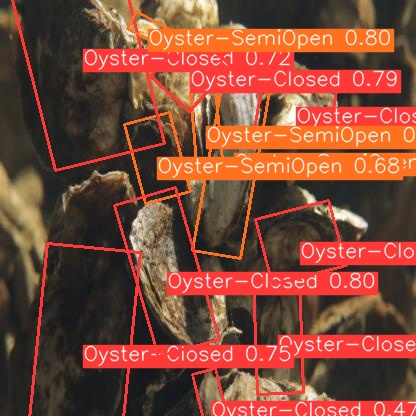

In [ ]:
import os, random
random_file = random.choice(os.listdir("/content/yolov5_obb/runs/detect/exp"))

from IPython.display import Image
Image(random_file)

In [ ]:
%cd /content/

/content


In [ ]:
!pip install youtube-dl
!pip uninstall -y opencv-python opencv-contrib-python
!apt install python3-opencv  # the one pre-installed have some issues
!youtube-dl https://www.youtube.com/watch?v=ZugD_6eccg8 -f 22 -o video.mp4
!ffmpeg -i video.mp4 -t 00:00:35 -c:v copy video-clip.mp4

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.9 MB 7.6 MB/s 
Found existing installation: opencv-python 4.6.0.66
Uninstalling opencv-python-4.6.0.66:
  Successfully uninstalled opencv-python-4.6.0.66
Found existing installation: opencv-contrib-python 4.1.2.30
Uninstalling opencv-contrib-python-4.1.2.30:
  Successfully uninstalled opencv-contrib-python-4.1.2.30
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  python3-numpy
Suggested packages:
  python-numpy-doc python3-nose python3-numpy-dbg
The following NEW packages will be installed:
  python3-numpy python3-opencv
0 upgraded, 2 newly installed, 0 to remove and 62 not upgraded.
Need to get 2,477 kB of archive

In [ ]:
!python -m pip install opencv-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
%cd /content/yolov5_obb/

/content/yolov5_obb


In [ ]:
!python detect.py --weights runs/train/exp/weights/best.pt --conf-thres 0.3 --source /content/video.mp4 --line-thickness 2 --device 0 --agnostic

detect: weights=['runs/train/exp/weights/best.pt'], source=/content/video.mp4, imgsz=[840, 840], conf_thres=0.3, iou_thres=0.2, max_det=1000, device=0, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=True, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=2, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 6e7ab84 torch 1.10.1+cu113 CUDA:0 (Tesla P100-PCIE-16GB, 16281MiB)

Fusing layers... 
Model Summary: 213 layers, 2006764 parameters, 0 gradients, 4.9 GFLOPs
video 1/1 (1/1550) /content/video.mp4: 512x864 5 Oyster-Closeds, Done. (0.019s)
video 1/1 (2/1550) /content/video.mp4: 512x864 5 Oyster-Closeds, Done. (0.014s)
video 1/1 (3/1550) /content/video.mp4: 512x864 4 Oyster-Closeds, Done. (0.013s)
video 1/1 (4/1550) /content/video.mp4: 512x864 4 Oyster-Closeds, 1 Oyster-SemiOpen, Done. (0.013s)
video 1/1 (5/1550) /content/video.mp4: 512x864 4 Oyster-Close

In [ ]:
files.download('./runs/detect/exp7/video.mp4')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>